# The Metropolis–Hastings (MH) Algorithm 

---

## **1. Overview**

The **Metropolis–Hastings (MH)** algorithm is a general-purpose method for **sampling from a target probability distribution** — especially when direct sampling is difficult.  

We’ll illustrate it using **self-avoiding paths (SAPs)** as a motivating example.

---

## **2. Self-Avoiding Paths (SAPs)**

A **path of length $N$ in $\mathbb{R}^2$** is defined by a sequence of direction vectors:

$$
\delta(i) \in \{(-1,0), (1,0), (0,-1), (0,1)\}, \quad i = 0,\ldots,N-1.
$$

We define the **sequence of points**:

$$
\begin{aligned}
p(0) &= (0,0),\\
p(1) &= \delta(0),\\
p(2) &= \delta(0) + \delta(1),\\
\vdots \\
p(N) &= \delta(0) + \cdots + \delta(N-1).
\end{aligned}
$$

Then the path is the ordered sequence $[p(0), p(1), \ldots, p(N)]$.  
We call it a **self-avoiding path (SAP)** if all points are distinct — i.e., it never visits the same location twice.

---

### **Example**

If $N=25$ and the directions $\delta(i)$ are:
$(1,0), (0,1), (1,0), (0,1), (1,0), (0,-1), (1,0), (1,0), (1,0), (1,0), (0,1), (1,0), (0,1), (0,1), (1,0), (0,-1), (0,-1), (1,0), (1,0), (0,1), (-1,0), (0,1), (0,1), (1,0), (1,0)$  
then $p(i)$ traces a self-avoiding curve through the integer grid.

---

## **3. Uniform Distribution for SAPs**

We want all SAPs of a given length $N$ to be **equally likely**.  
There are $4^N$ possible direction sequences, but not all of them are self-avoiding.

A uniform SAP can be generated by **acceptance–rejection sampling**:

1. Randomly sample $N$ directions $\delta(0),\ldots,\delta(N-1)$ uniformly and independently.  
2. Compute $p(0),\ldots,p(N)$.  
3. If the path is self-avoiding, accept; otherwise, reject and resample.  
4. Return the accepted path.

---

## **4. Number of Bends in a Path**

The **number of bends $B$** in a path is the count of direction changes:

$$
B = |\{\, i : \delta(i+1) \neq \delta(i) \,\}|, \quad i=0,\ldots,N-2.
$$

---

## **5. Need for Metropolis–Hastings (MH)**

Acceptance–rejection becomes **inefficient** for large $N$ because the chance of generating a valid SAP is extremely small.  
We instead use a **Markov chain** that has the desired uniform distribution as its **stationary distribution**.

---

## **6. Markov Chains and Detailed Balance**

Let the state space be $S = \{1,\ldots,K\}$ with stationary distribution $\pi$ (row vector).  
If $Q = (q_{ij})$ is a $K\times K$ transition matrix satisfying the **Detailed Balance Condition (DBC):**

$$
\pi_i q_{ij} = \pi_j q_{ji}, \quad \forall\, i,j,
$$

then $\pi Q = \pi$, so $\pi$ is the stationary distribution.

---

### **Proof (sketch)**

For any fixed $k$:

$$
(\pi Q)_k = \sum_i \pi_i q_{ik} = \sum_i \pi_k q_{ki} = \pi_k \sum_i q_{ki} = \pi_k.
$$

If the chain is **aperiodic** and **irreducible**, then it converges to $\pi$.

---

## **7. Constructing a Transition Matrix**

View the **state space as a graph**:
- Each vertex = a possible SAP.
- Two SAPs are **neighbors** if one can be obtained from the other by changing a single direction.

Let $N_i$ = set of neighbors of state $i$, and $|N_i| = N_i$.

We can define transitions in two ways.

---

### **Method 1**

When in state $i$:
1. Randomly choose a **neighbor** $j \in N_i$ with equal probability $1/N_i$.
2. Move to $j$ with probability:
   $$
   \min\!\left(1, \frac{\pi_j N_i}{\pi_i N_j}\right),
   $$
   otherwise stay in $i$.

Then:
$$
q_{ij} = \frac{1}{N_i} \min\!\left(1, \frac{\pi_j N_i}{\pi_i N_j}\right)
$$

and $q_{ii}$ = $1 - \sum_{j\in N_i} q_{ij}$.

✅ This satisfies the detailed balance condition:
$$
\pi_i q_{ij} = \pi_j q_{ji}.
$$

---

### **Method 2**

Alternatively, **nominate** neighbor $j$ with probability proportional to $\pi_j$:

$$
P(\text{nominate } j | i) = \frac{\pi_j}{\sum_{u \in N_i} \pi_u}.
$$

Then, move to $j$ with probability:

$$
\min\!\left(1, \frac{\sum_{u\in N_i}\pi_u}{\sum_{v\in N_j}\pi_v}\right).
$$

This version also satisfies detailed balance.

---

### **Key Insight**

To run the MH chain, we **don’t need normalized probabilities**.  
Only the **ratios** $\pi_i / \pi_j$ are needed — normalization constants cancel out.

---

## **8. MH for Uniform Self-Avoiding Paths**

For **uniform SAPs**, all $\pi_i$ are constant, so the acceptance ratio simplifies.

Neighbor definition:
- For a given SAP $p$ with directions $\delta(0),\ldots,\delta(N-1)$,
- Neighbors are all SAPs obtained by modifying **one** direction.

Transition (Method 1):

1. Start at $X_0 = p$ with all directions $(1,0)$.  
2. At step $t$:
   - List all SAP neighbors $N_p$.
   - Randomly select one $p' \in N_p$.
   - Compute $|N_p|$ and $|N_{p'}|$.
   - Draw $U \sim \text{Uniform}(0,1)$.
   - If $U < |N_p| / |N_{p'}|$, set $X_{t+1} = p'$; otherwise, $X_{t+1} = p$.

Because $\pi_i$ are constant, both Method 1 and 2 give the same result.

---

## **9. Autocorrelation and Convergence**

The MH algorithm is only guaranteed to approximate the stationary distribution after enough iterations.  
We must check whether $M$ (the number of steps between samples) is large enough.

One diagnostic: compute the **lag-1 autocorrelation** of the bend counts $B_0,\ldots,B_{n-1}$:

$$
\rho =
\frac{
\sum_{i=0}^{n-2}(B_i - \bar{B})(B_{i+1} - \bar{B})
}{
\sum_{i=0}^{n-1}(B_i - \bar{B})^2
}
$$

---

## **10. Alternative Distributions**

We can bias the sampling toward **less bending** by defining:

$$
\pi_p = C e^{-\gamma b(p)},
$$

where:
- $b(p)$ = number of bends in path $p$
- $\gamma > 0$ controls smoothness (larger $\gamma$ → fewer bends)
- $C$ = normalizing constant ensuring $\sum_p \pi_p = 1$

In MH, **$C$ is not needed** — it cancels in ratios $\pi_i / \pi_j$.

---

## **11. Summary**

| Concept | Description |
|----------|--------------|
| **SAP** | Path in $\mathbb{Z}^2$ with no repeated points |
| **Uniform SAP sampling** | All SAPs equally likely |
| **Acceptance–Rejection** | Works for small $N$, inefficient for large $N$ |
| **Metropolis–Hastings** | Builds a Markov chain with desired stationary distribution |
| **Detailed Balance** | Ensures stationary distribution $\pi$ |
| **Ergodicity** | Guarantees convergence to $\pi$ |
| **Weighted SAPs** | Favor smoother paths via $\pi_p \propto e^{-\gamma b(p)}$ |

---

It will help to have a functiont that plots a path for a given Nx2 matrix of directions.

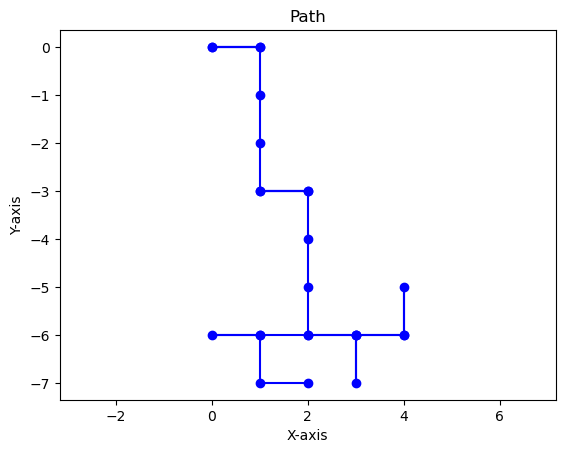

In [1]:
import numpy as np
import matplotlib.pyplot as plt
def plotpath(directions):
    dx=directions[:,0]
    dy=directions[:,1]
    px=np.cumsum(dx)
    py=np.cumsum(dy)
    px=np.insert(px,0,0)
    py=np.insert(py,0,0)
    plt.plot(px, py, marker='o', linestyle='-', color='b')
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.title('Path')
    plt.axis('equal')
    plt.show()
np.random.seed(58128)
R=np.array([[-1,0],[1,0],[0,-1],[0,1]])
I=np.random.choice(range(4),size=25)
D=R[I]
plotpath(D)   

### **Problem 1**

> **Write a function** that takes a sequence of $N$ directions (an $N\times2$ NumPy array)  
> and returns `True` if the resulting path is self-avoiding and `False` otherwise.

---

In [2]:
import numpy as np
def CheckSelfAvoiding(D):
    N=D.shape[0]
    dx=D[:,0]
    dy=D[:,1]
    px=np.cumsum(dx)
    py=np.cumsum(dy)
    px=np.insert(px,0,0)
    py=np.insert(py,0,0)
    #
    # Create dictionary with positopms visited as keys.
    # These are converted to 2-tuples to make them hashable.
    #
    position_visited={}
    for i in range(N+1):
        pos=(px[i],py[i]) 
        if pos in position_visited.keys():
            return False
        else:
            position_visited[pos]=True 
    return True

False


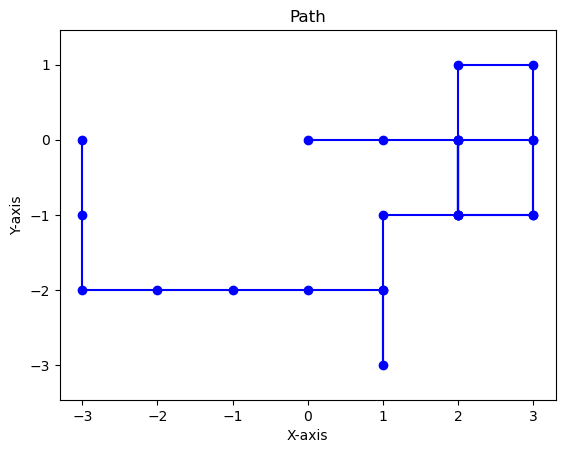

In [4]:
np.random.seed(673)
R=np.array([[-1,0],[1,0],[0,-1],[0,1]])
I=np.random.choice(range(4),size=25)
D=R[I]
res=CheckSelfAvoiding(D)
print(res)
plotpath(D)

True


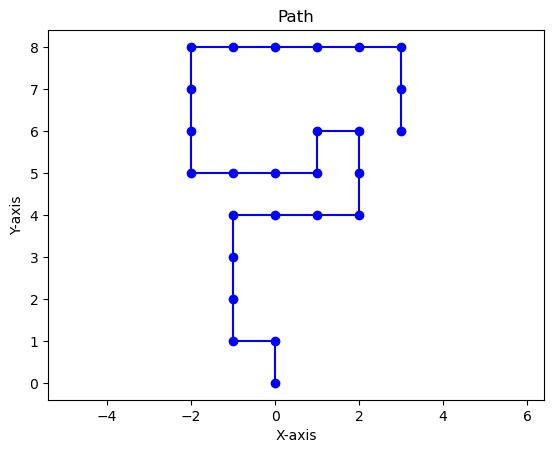

In [5]:
np.random.seed(5812)
R=np.array([[-1,0],[1,0],[0,-1],[0,1]])
I=np.random.choice(range(4),size=25)
D=R[I]
res=CheckSelfAvoiding(D)
print(res) 
plotpath(D)

### **Problem 2**

> Using Monte Carlo simulation, **estimate**
> $$
> p_N = P(\text{random path of length } N \text{ is self-avoiding})
> $$
> for various values of $N$.  
>
> Discuss how accurately $p_N$ can be estimated and how it behaves as $N$ increases.

---

In [6]:
def ProbabilityOfSelfAvoidance(N,ntrials):
    R=np.array([[-1,0],[1,0],[0,-1],[0,1]])
    ctr=0
    for trial in range(ntrials):
        I=np.random.choice(range(4),size=N)
        D=R[I]
        res=CheckSelfAvoiding(D)
        ctr+=res
    p=ctr/ntrials
    return(p)
print(ProbabilityOfSelfAvoidance(5,10000))
print(ProbabilityOfSelfAvoidance(10,10000))
print(ProbabilityOfSelfAvoidance(15,10000))
print(ProbabilityOfSelfAvoidance(20,10000))
# Note: bigger sample size needed here
print(ProbabilityOfSelfAvoidance(25,100000)) 

0.2767
0.0399
0.0063
0.0005
7e-05


### **Problem 3**

> For various values of $N$, estimate the **expected number of bends** in a uniformly distributed SAP using Monte Carlo simulation.

---

In [7]:
def Bends(D):
    N=D.shape[0]
    L=[i for i in range(0,N-1) if D[i][0]!=D[i+1][0] or D[i][1]!=D[i+1][1]] 
    return(length(L))

10


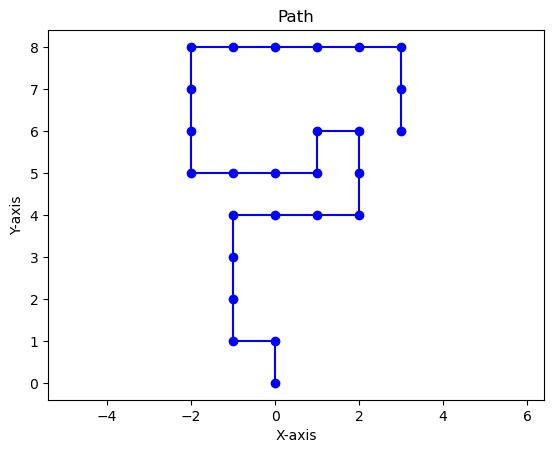

In [9]:
# Test cell1 for Problem2 do not delete or modify this cell
# Do execute it
np.random.seed(5812)
R=np.array([[-1,0],[1,0],[0,-1],[0,1]])
I=np.random.choice(range(4),size=25)
D=R[I]
print(Bends(D))
plotpath(D)

Function to sample M uniform SAPs of length N to estimate the expected number of bends
for a uniformly distributed SAP.

In [19]:
def estimate_expected_number_of_bends(N,M):
    R=np.array([[-1,0],[1,0],[0,-1],[0,1]])
    Bvec=np.zeros(M)
    for j in range(M):
        while True:
            I=np.random.choice(range(4),size=N)
            D=R[I]
            res=CheckSelfAvoiding(D)
            if res:
                break
        Bvec[j]=Bends(D)
    muhat=np.round(np.mean(Bvec),3)
    sigmahat=np.round(np.std(Bvec),3)
    stderr=sigmahat/np.sqrt(10000)
    muL=np.round(muhat-1.96*stderr,3)
    muU=np.round(muhat+1.96*stderr,3)
    return muhat, sigmahat, stderr, muL, muU
muhat, sigmahat, stderr, muL, muU=estimate_expected_number_of_bends(10,1000)
print("est = ",muhat)
print("std = ",sigmahat)
print("95% CI = ","("+str(muL)+","+str(muU)+")")

est =  5.562
std =  1.415
95% CI =  (5.534,5.59)


### **Problem 4**

> Implement Method 1.  
>  
> **Function inputs:**
> - `N`: length of the SAP  
> - `n`: number of samples  
> - `M`: number of MH steps between samples  
>  
> **Output:**
> - An `(n × N × 2)` NumPy array whose `i`-th row is the value of the chain $X_{(i+1)M}$ for $i=0,\ldots,n-1$.  
>  
> Try to make your code efficient.

---

In [20]:
def ListOfNeighbors(D):
    N=D.shape[0]
    L=[]
    rowlist=[[-1,0],[1,0],[0,-1],[0,1]]
    for i in range(N):
        current_row=D[i,:]
        for newrow in rowlist:
            if np.array_equal(current_row,newrow):
                continue
            Dtemp=D.copy()
            Dtemp[i,:]=newrow
            if CheckSelfAvoiding(Dtemp):
                L.append(Dtemp)
    return(L)

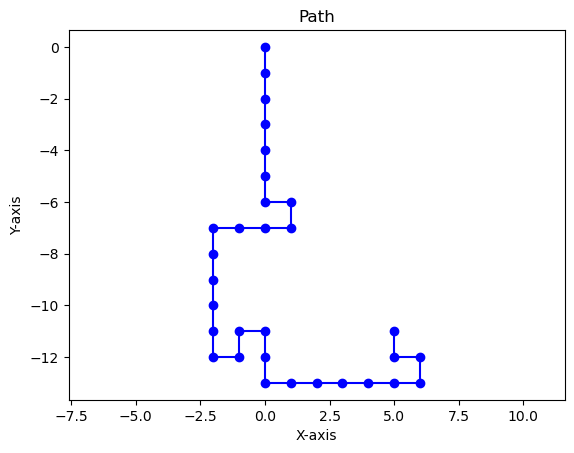

39


In [24]:
import numpy as np
np.random.seed(77811411)
while True:
    R=np.array([[-1,0],[1,0],[0,-1],[0,1]])
    I=np.random.choice(range(4),size=30)
    D=R[I]
    res=CheckSelfAvoiding(D)
    if res:
        break
plotpath(D)
NeighborList=ListOfNeighbors(D)
print(len(NeighborList))

**In the following cells we plot some neighbors of the SAP we generated above**

Make sure these look like plausible neighbors of D

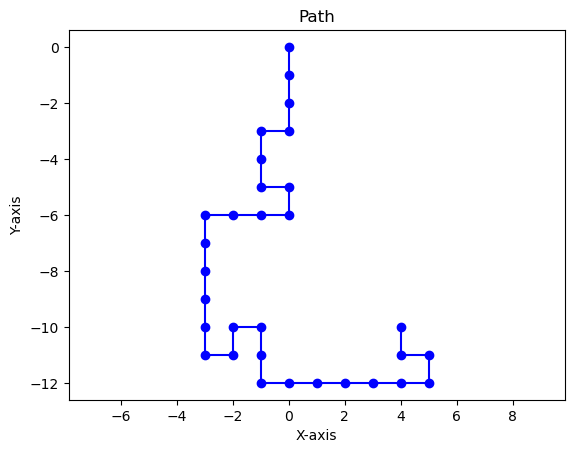

In [26]:
plotpath(NeighborList[6])

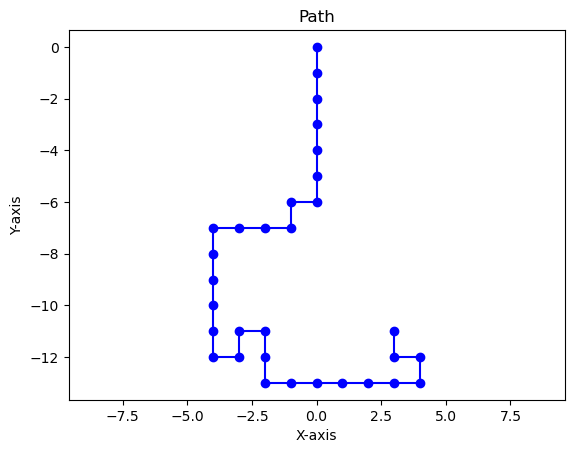

In [27]:
plotpath(NeighborList[11])

Implementation of the MH algorithm to generate a sequence of uniformly distributed SAP.
Note that for efficiency we don't recalculate the neighbor list if we don't move, and if we do move, we retain the list for the SAP we moved to. So, the number of times we calculate a neighbor list is within 1 of the number of times we move.

In [37]:
def GenerateUniformSAPs(N,n,M):
    
    # Initialize current position D and its neighbor list
    D=np.array([[1,0] for i in range(N)])
    NeighborList=ListOfNeighbors(D)
    nNeighbors=len(NeighborList)
    #
    # List of D's for output is a 3d numpy array that is n x N x 2
    #
    OutputList=np.zeros((n,N,2))
    #
    # keep track of number of SAP's generated
    #
    nSAPGenerated=0
    for SAPcount in range(n):
        for steps in range(M):
            #
            # pick a neighbor at random
            #
            I=np.random.choice(range(nNeighbors))    
            D2=NeighborList[I]
            # 
            # compute neighbor list for selected SAP
            #
            NeighborList2=ListOfNeighbors(D2)
            nNeighbors2=len(NeighborList2)
            #
            # get the probability of a move
            acceptance_prob=nNeighbors/nNeighbors2
            u=np.random.uniform(0,1)
            if u<acceptance_prob:
                D=D2
                NeighborList=NeighborList2
                nNeighbors=nNeighbors2
        #
        # add SAP to list
        #
        OutputList[SAPcount,:,:]=D
    return(OutputList)
#
# test function - generate 100 supposedly uniformly distributed SAPs of length 10
# using a gap of size 1,000 - this took about 142 seconds to run
#
import time
start_time=time.perf_counter()
res=GenerateUniformSAPs(10,100,1000)
end_time=time.perf_counter()
print(end_time-start_time)

142.0653076000017


### **Problem 5**

> Write a function that computes the **number of bends** in each sample from Problem 4, giving:
> $$
> B_0, B_1, \ldots, B_{n-1}.
> $$

---

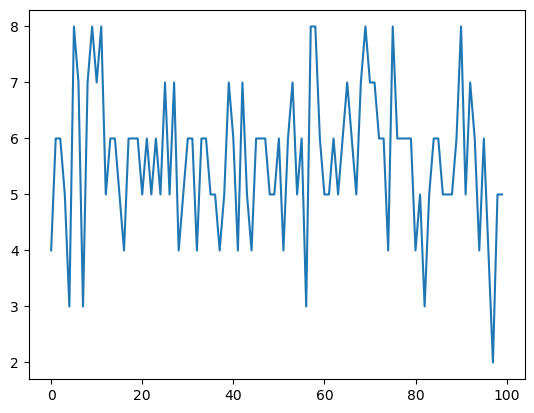

In [51]:
bends=np.array([Bends(res[i]) for i in range(100)])
plt.plot(bends)

### **Problem 6**

> With $N=10$, generate a large sample of SAPs for various $M$.  
>  
> Compute the lag-1 autocorrelation $\rho$.  
>  
> Does $\rho$ start large for small $M$ and decrease as $M$ increases?

---

In [52]:
def autocorrelation(v):
    n=len(v)
    v1=v[0:(n-1)]
    v2=v[1:n]
    v1=v1-np.mean(v1)
    v2=v2-np.mean(v2)
    v=v-np.mean(v)
    ac=(np.sum(v1*v2)/(n-1))/(np.sum(v**2)/n)
    return(ac)
print(autocorrelation(bends))

0.029140443181847258


Repeat the above for different values of gap length M and plot the dependence of autocorrelation vs M.

In [60]:
acvalues=[]
for M in range(2,100):
    res=GenerateUniformSAPs(10,100,M)
    ac=autocorrelation(np.array([Bends(res[i]) for i in range(100)]))
    print(ac)
    acvalues.append(ac)

0.5119997027831521
0.3634332189241552
0.20811330396422542
0.019937643182039336
0.24196704288764126
-0.10665471241379577
-0.11545766219728822
0.13745028661028036
-0.11505367818133681
0.018880202571552804
0.061126461562607086
-0.04584895710686491
-0.17197171752211524
-0.08022961512736498
-0.1192826857019499
0.029328374808422573
0.22838586948913384
0.20595725263972214
-0.18919651462084602
0.0750840671789288
-0.0015072310161615666
-0.11186328571463278
-0.007268228592055376
-0.11655664682863356
0.1038766756175013
0.0521211505861092
0.06717924740125028
-0.030610890933873345
-0.08613813860295647
-0.035922234993037275
-0.07909912872309716
-0.06038833065076361
0.044491553462011224
0.06473270722843484
-0.04934989735221354
-0.1298502844355972
-0.09043146512999617
-0.10753061799752321
-0.06623357699497483
-0.10576711704161187
-0.03939868348283713
-0.02139562884628219
-0.01690631962109247
-0.013552332545721881
-0.08721679349710079
0.017819681522578727
-0.08938390503997667
-0.15360889732889677
0.004

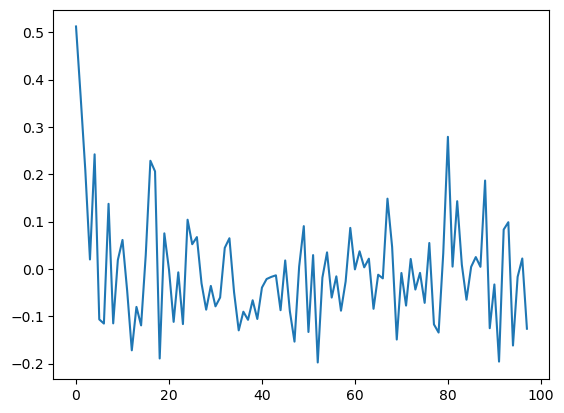

In [61]:
plt.plot(acvalues)

How does these values compare with autocorrelations of series of iid random variables?

<Axes: >

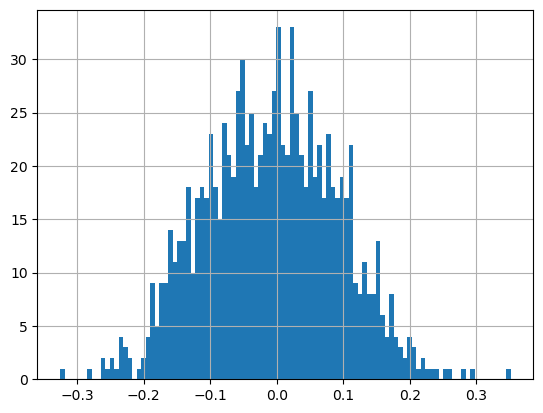

In [67]:
import pandas as pd
acnullvalues=np.zeros(1000)
for i in range(1000):
    b=np.random.choice(range(10),size=100)
    acnullvalues[i]=autocorrelation(b)
pd.Series(acnullvalues).hist(bins=100)

We see that even if the bends were iid getting an autocorrelation as big as .15 is not so unusual.
Let's try some bigger gaps.

In [68]:
acvalues=[]
for M in range(100,1000,100):
    res=GenerateUniformSAPs(10,100,M)
    ac=autocorrelation(np.array([Bends(res[i]) for i in range(100)]))
    print(ac)
    acvalues.append(ac)

-0.08245121228706498
-0.025549762589582324
-0.07291990539650743
0.023603198340705615
-0.14688132390602057
0.03715575707724388
0.03514923045153576
-0.15104268790642472
-0.04489568385384242


### **Problem 7**

> Implement both MH methods for the weighted distribution:
> $$
> \pi_p \propto e^{-\gamma b(p)}.
> $$
>  
> Write functions similar to Problem 4 that take $\gamma$ as an additional parameter.  
>  
> Compare results for different $\gamma$ values.

---


In [86]:
def pi(D):
    gamma=0.
    B=Bends(D)
    return np.exp(-gamma*B)
def SampleDistributionMethod1(N,n,M,gamma):    
    # Initialize current position D and its neighbor list
    D=np.array([[1,0] for i in range(N)])
    NeighborList=ListOfNeighbors(D)
    nNeighbors=len(NeighborList)
    p=pi(D)
    #
    # List of D's for output is a 3d numpy array that is n x N x 2
    #
    OutputList=np.zeros((n,N,2))
    #
    # keep track of number of SAP's generated
    #
    nSAPGenerated=0
    for SAPcount in range(n):
        for steps in range(M):
            #
            # pick a neighbor at random
            #
            I=np.random.choice(range(nNeighbors))    
            D2=NeighborList[I]
            p2=pi(D2)
            # 
            # compute neighbor list for selected SAP
            #
            NeighborList2=ListOfNeighbors(D2)
            nNeighbors2=len(NeighborList2)
            #
            # get the probability of a move
            acceptance_prob=nNeighbors*p2/(nNeighbors2*p)
            u=np.random.uniform(0,1)
            if u<acceptance_prob:
                D=D2
                NeighborList=NeighborList2
                nNeighbors=nNeighbors2
                p=p2
        #
        # add SAP to list
        #
        OutputList[SAPcount,:,:]=D
    return(OutputList)

Sample the distribution 100 times using the algorithm and estimate expected number of bends.

In [87]:
res=SampleDistributionMethod1(10,100,100,gamma=1)    
bends=np.array([Bends(res[i]) for i in range(100)])
muhat=bends.mean()
stderr=bends.std()/np.sqrt(100)
muL=muhat-1.96*stderr
muU=muhat+1.96*stderr
print(muhat)
print(muL)
print(muU)

5.52
5.266742515214259
5.7732574847857405


Method 2

In [96]:
def SampleDistributionMethod2(N,n,M,gamma):    
    # Initialize current position D and its neighbor list
    D=np.array([[1,0] for i in range(N)])
    NeighborList=ListOfNeighbors(D)
    p=pi(D)
    #
    # compute pi values and their sume for the neighbors
    #
    pivalues=[pi(v) for v in NeighborList]
    pivaluesum=sum(pivalues)
    normalizedpivalues=np.array(pivalues)/pivaluesum
    #
    # List of D's for output is a 3d numpy array that is n x N x 2
    #
    OutputList=np.zeros((n,N,2))
    #
    # keep track of number of SAP's generated
    #
    nSAPGenerated=0
    for SAPcount in range(n):
        for steps in range(M):
            #
            # pick a neighbor at random
            #
            nNeighbors=len(NeighborList)
            I=np.random.choice(range(nNeighbors),p=normalizedpivalues)   
            D2=NeighborList[I]
            # 
            # compute neighbor list for selected SAP
            #
            NeighborList2=ListOfNeighbors(D2)
            #
            # compute the pivalues for the neighbors
            # and their sum
            #
            pivalues2=[pi(v) for v in NeighborList2]
            pivaluesum2=sum(pivalues2)
            normalizedpivalues2=np.array(pivalues2)/pivaluesum2
            #
            # get the probability of a move
            acceptance_prob=pivaluesum/pivaluesum2
            u=np.random.uniform(0,1)
            if u<acceptance_prob:
                D=D2
                NeighborList=NeighborList2
                pivalues=pivalues2
                pivaluesum=pivaluesum2
                normalizedpivalues=normalizedpivalues2
        #
        # add SAP to list
        #
        OutputList[SAPcount,:,:]=D
    return(OutputList)

In [97]:
res=SampleDistributionMethod2(10,100,100,gamma=1)    
bends=np.array([Bends(res[i]) for i in range(100)])
muhat=bends.mean()
stderr=bends.std()/np.sqrt(100)
muL=muhat-1.96*stderr
muU=muhat+1.96*stderr
print(muhat)
print(muL)
print(muU)

5.7
5.46236262920155
5.93763737079845
